In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Add, Conv2DTranspose, LeakyReLU, add, ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, ELU
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.activations import elu, relu
from tensorflow.keras.applications import DenseNet121

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

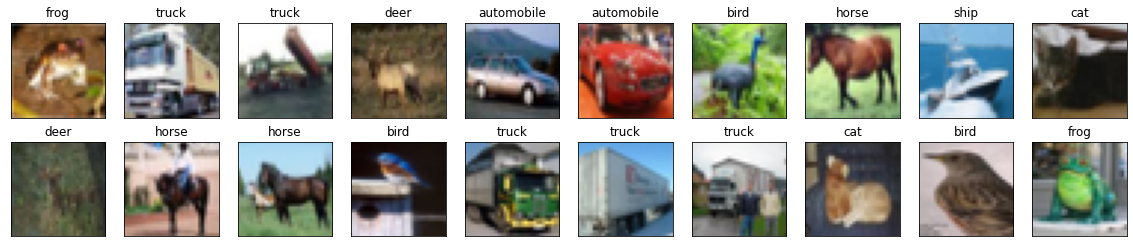

In [ ]:
# show some sample images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = plt.subplot(2, 10, idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(x_train[idx])
  plt.title(class_names[int(y_train[idx])])

In [ ]:
# change data type as float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize image data 
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
# one hot encoding
# Now we one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# shape o images
print('Shape of taining images: ', x_train.shape)
print('Shape of taining labels: ', y_train.shape)
print()
print('Shape of testing images: ', x_test.shape)
print('Shape of testing labels: ', y_test.shape)

Shape of taining images:  (50000, 32, 32, 3)
Shape of taining labels:  (50000, 10)

Shape of testing images:  (10000, 32, 32, 3)
Shape of testing labels:  (10000, 10)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
resnet_model = tf.keras.applications.resnet_v2.ResNet50V2(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)

In [ ]:
x = resnet_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units = 1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
out = Dense(units = 10, activation = 'softmax')(x)

model = Model(resnet_model.input, out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model_path = './drive/My Drive/PhD_Thesis/target_models/Rnet.h5'
checkpoint = ModelCheckpoint(model_path, 
                             monitor= "val_loss", 
                             verbose=1, 
                             save_best_only=True, 
                             mode= "auto", 
                             save_weights_only = False)

early = EarlyStopping(monitor= "val_loss", 
                      mode= "auto", 
                      patience = 10)

callbacks_list = [checkpoint, early]

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,
                      validation_data = (x_test, y_test),
                      epochs = 100, batch_size = 100, callbacks = callbacks_list)

Epoch 1/100
500/500 [==============================] - 39s 54ms/step - loss: 2.1852 - accuracy: 0.2162 - val_loss: 30.3349 - val_accuracy: 0.2246

Epoch 00001: val_loss improved from inf to 30.33491, saving model to ./drive/My Drive/PhD_Thesis/target_models/Rnet.h5
Epoch 2/100
500/500 [==============================] - 27s 54ms/step - loss: 1.4240 - accuracy: 0.5002 - val_loss: 1.1535 - val_accuracy: 0.6091

Epoch 00002: val_loss improved from 30.33491 to 1.15351, saving model to ./drive/My Drive/PhD_Thesis/target_models/Rnet.h5
Epoch 3/100
500/500 [==============================] - 27s 54ms/step - loss: 1.1428 - accuracy: 0.6214 - val_loss: 1.1348 - val_accuracy: 0.6364

Epoch 00003: val_loss improved from 1.15351 to 1.13481, saving model to ./drive/My Drive/PhD_Thesis/target_models/Rnet.h5
Epoch 4/100
500/500 [==============================] - 27s 54ms/step - loss: 1.1584 - accuracy: 0.6207 - val_loss: 1.1128 - val_accuracy: 0.6319

Epoch 00004: val_loss improved from 1.13481 to 1.11

In [ ]:
model = load_model('./drive/My Drive/PhD_Thesis/target_models/Rnet.h5')

In [ ]:
predictions = model.predict(x_test)
#np.argmax(predictions[0])

In [ ]:
orig_loss, orig_accuracy = model.evaluate(x_test[:1000], y_test[:1000])
print()
print('Test Accuracy: ', round(orig_accuracy, 4))
print('Test Los: ', round(orig_loss, 4))

32/32 [==============================] - 1s 20ms/step - loss: 0.8115 - accuracy: 0.7560

Test Accuracy:  0.756
Test Los:  0.8115


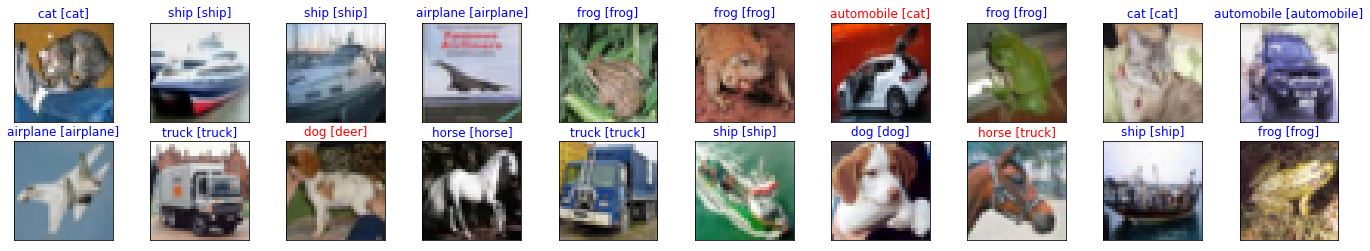

In [ ]:
#show some test images
fig = plt.figure(figsize=(24, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_test[idx])
  
  if class_names[int(np.argmax(predictions[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(predictions[idx]))] + "]", color = color)

# Fast Grdient Sign Method (FGSM)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.FGSM()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.01)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

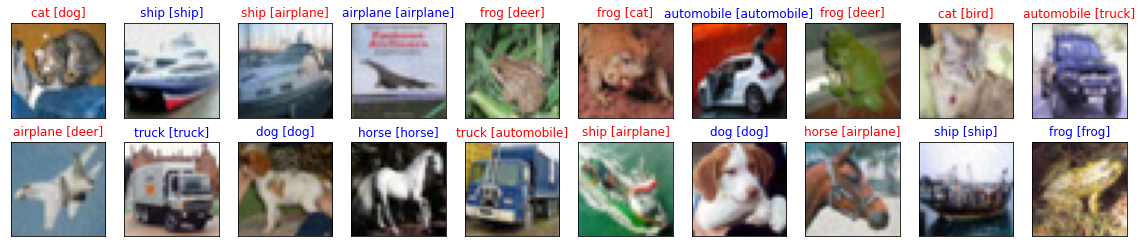

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 2.1627 - accuracy: 0.3950

Model Accuracy on test images:  0.395
Model Loss on test images:  2.1627


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

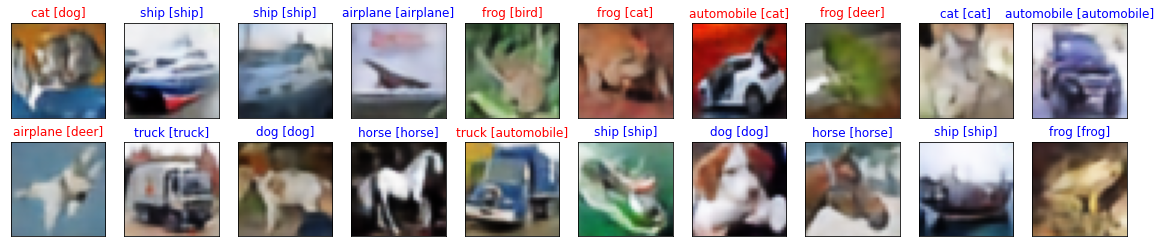

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.0114 - accuracy: 0.6750

Model Accuracy on restored images:  0.675
Model Loss on test images:  1.0114


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8929


# Basic Iterative Method (BIM)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2BasicIterativeAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.2)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

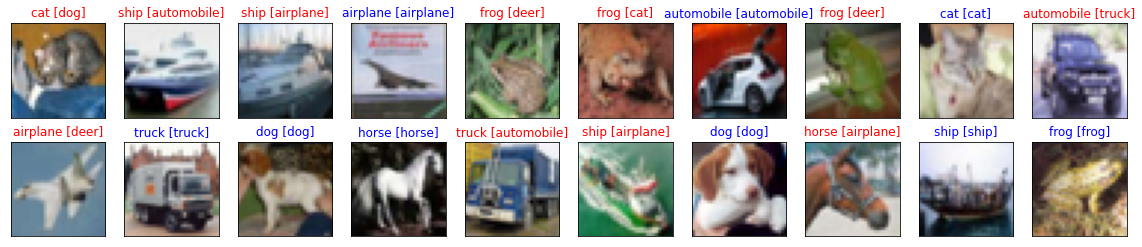

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.6838 - accuracy: 0.4800

Model Accuracy on test images:  0.48
Model Loss on test images:  1.6838


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_bim.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

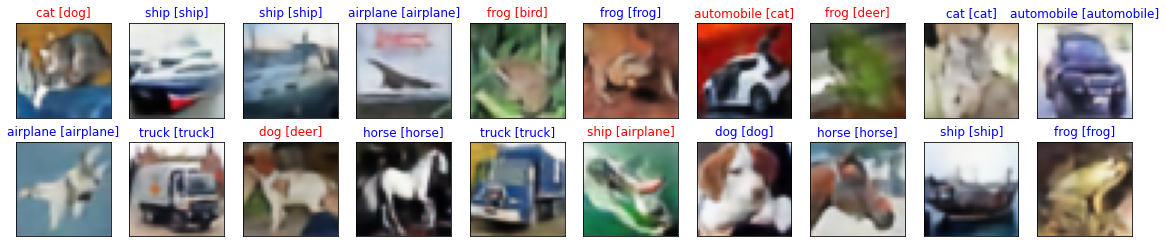

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.0271 - accuracy: 0.6620

Model Accuracy on restored images:  0.662
Model Loss on test images:  1.0271


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8757


# Projected Gradient Descent (PGD)

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.PGD()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.01)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

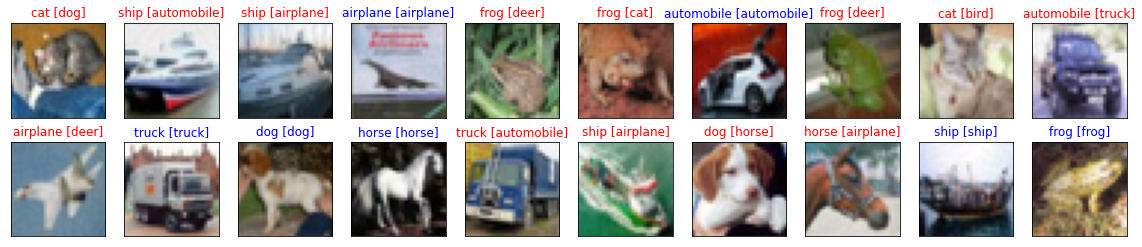

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 14ms/step - loss: 2.9350 - accuracy: 0.3230

Model Accuracy on test images:  0.323
Model Loss on test images:  2.935


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_pgd.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

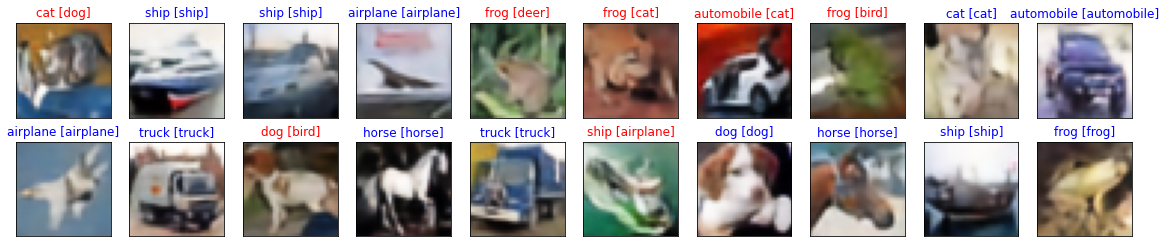

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.0370 - accuracy: 0.6470

Model Accuracy on restored images:  0.647
Model Loss on test images:  1.037


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8558


# Deep Fool Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2DeepFoolAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.2)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

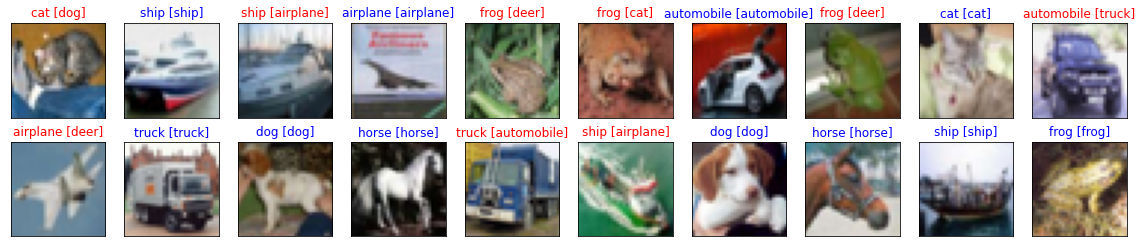

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 12ms/step - loss: 0.9796 - accuracy: 0.5580

Model Accuracy on test images:  0.558
Model Loss on test images:  0.9796


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_dfa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

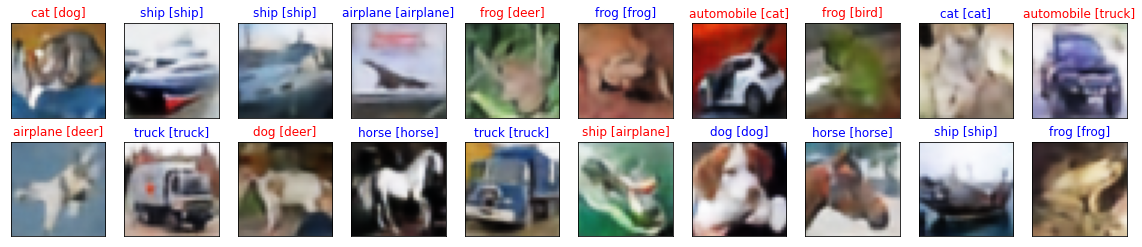

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.0002 - accuracy: 0.6800

Model Accuracy on restored images:  0.68
Model Loss on test images:  1.0002


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.8995


# Carlini and Wanger Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.L2CarliniWagnerAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 5)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

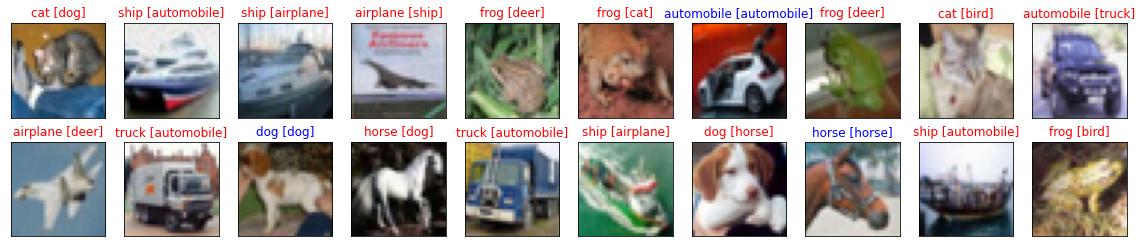

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.1845 - accuracy: 0.1450

Model Accuracy on test images:  0.145
Model Loss on test images:  1.1845


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_cwa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

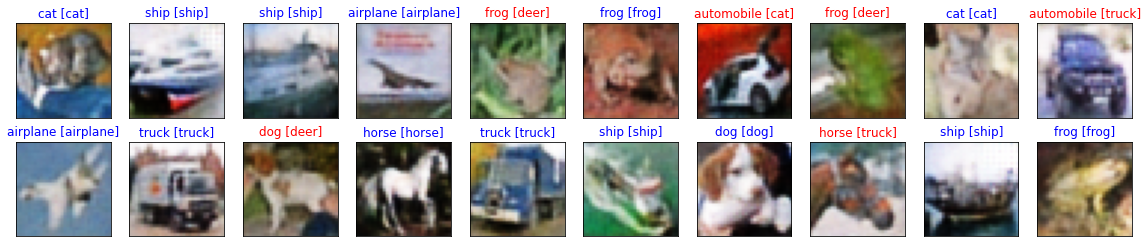

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 0.8965 - accuracy: 0.7150

Model Accuracy on restored images:  0.715
Model Loss on test images:  0.8965


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.9458


# Spatial Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_test[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_test[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.SpatialAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c)

# adversarial purtubation
perturb = adv_img - x_test[:1000]

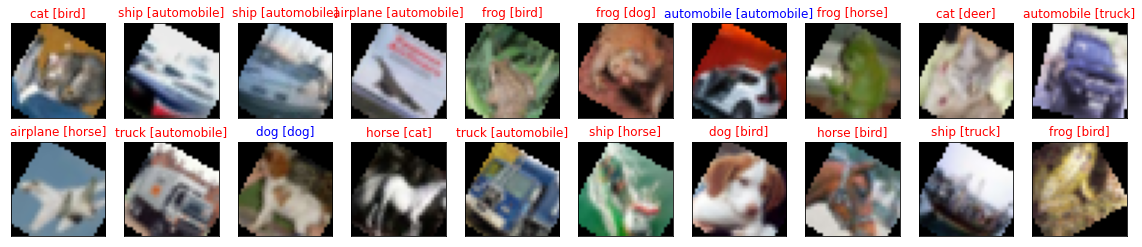

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy(), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[np.argmax(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[np.argmax(y_test[idx])] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 2.7374 - accuracy: 0.0580

Model Accuracy on test images:  0.058
Model Loss on test images:  2.7374


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/cifar10/cifar10_spa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

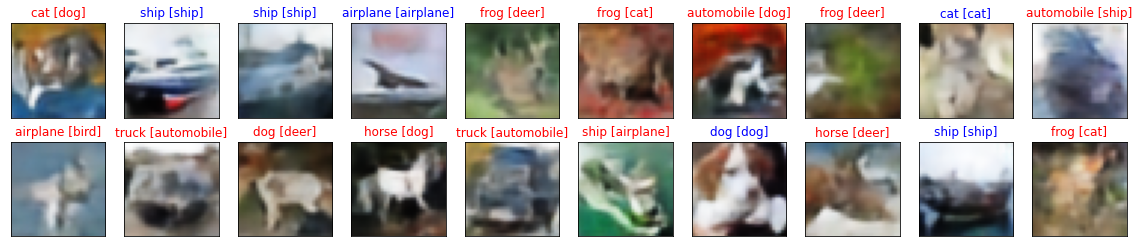

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  #plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[np.argmax(y_test[idx])] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx], cmap = 'gray')
  plt.title(class_names[np.argmax(y_test[idx])] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 13ms/step - loss: 1.5870 - accuracy: 0.4980

Model Accuracy on restored images:  0.498
Model Loss on test images:  1.587


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.6587
